In [2]:
%matplotlib inline

In [5]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 5 #20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

train loss:2.2997565151210977
=== epoch:1, train acc:0.099, test acc:0.118 ===
train loss:2.296365137990272
train loss:2.2903080652683387
train loss:2.285144737796101
train loss:2.2780689851543747
train loss:2.268743247926644
train loss:2.2424429604085976
train loss:2.2312317474752237
train loss:2.207015049211623
train loss:2.1890639739114093
train loss:2.1480308205292022
train loss:2.1206807114340824
train loss:2.015765530520061
train loss:1.9981401415904587
train loss:1.9613007071451176
train loss:1.8360551428490668
train loss:1.7788719412077934
train loss:1.6816887886461467
train loss:1.594232675432568
train loss:1.5170163676463035
train loss:1.4361429703068815
train loss:1.4032154239721952
train loss:1.3075998376334852
train loss:1.1708518575503781
train loss:1.0541386779564264
train loss:1.0197268665423957
train loss:0.9547125579311465
train loss:0.9958683346328887
train loss:0.98003226142894
train loss:0.80680517450778
train loss:0.8067347084989414
train loss:0.7252024863143589
t

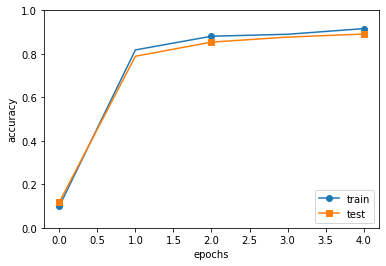

In [6]:
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

CNNを用いたディープラーニングで実際に学習を行うという手順を体験することが出来た。これからはmnistのような学習用の素材ではなく、一般のデータを学習用として自力で成型し、自分で学習の出来を考察し改良を重ねて行くという、今までの比ではないほどに難しくなっていくと思うので、気を引き締めて学びに取り組んでいきたい。